<a href="https://colab.research.google.com/github/FatemeNazemzade/First-Repository/blob/main/ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score , accuracy_score
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import random
from imblearn.under_sampling import RandomUnderSampler

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1zJJ_1OKNJZzmIXYmpsmgRgX_SpKR_tA0

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1zJJ_1OKNJZzmIXYmpsmgRgX_SpKR_tA0
To: /content/Churn_Modelling.csv
100% 685k/685k [00:00<00:00, 140MB/s]


In [ ]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset = dataset.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [ ]:
dataset.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
correlation_matrix = dataset.corr()['Exited'].sort_values(ascending=False)
correlation_matrix

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
unique, counts = np.unique(y, return_counts=True)
print("Class counts before balancing:", dict(zip(unique, counts)))

Class counts before balancing: {0: 7963, 1: 2037}


In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

unique_resampled, counts_resampled = np.unique(y_resampled, return_counts=True)
print("Class counts after balancing:", dict(zip(unique_resampled, counts_resampled)))
print('\n')
print("New balanced dataset shape:", X_resampled.shape, y_resampled.shape)

Class counts after balancing: {0: 2037, 1: 2037}


New balanced dataset shape: (4074, 10) (4074,)


In [ ]:
X = X_resampled
y = y_resampled
print(X.shape, y.shape)

(4074, 10) (4074,)


In [ ]:
print(X)

[[606 'Spain' 'Male' ... 1 0 89099.18]
 [683 'France' 'Female' ... 1 1 38784.42]
 [744 'France' 'Female' ... 1 1 189016.14]
 ...
 [597 'France' 'Female' ... 1 0 69384.71]
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]]


In [ ]:
print(y)

[0 0 0 ... 1 1 1]


### Encoding categorical data

In [ ]:
counts = dataset['Gender'].value_counts()
print(counts)

Male      5457
Female    4543
Name: Gender, dtype: int64


In [ ]:
counts = dataset['Geography'].value_counts()
print(counts)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Label Encoding the "Gender" column

In [ ]:
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

[[606 'Spain' 1 ... 1 0 89099.18]
 [683 'France' 0 ... 1 1 38784.42]
 [744 'France' 0 ... 1 1 189016.14]
 ...
 [597 'France' 0 ... 1 0 69384.71]
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]]


In [ ]:
X[0,:]

array([606, 'Spain', 1, 37, 8, 154712.58, 2, 1, 0, 89099.18], dtype=object)

In [ ]:
X[4073,:]

array([772, 'Germany', 1, 42, 3, 75075.31, 2, 1, 0, 92888.52],
      dtype=object)

One Hot Encoding the "Geography" column

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 0.0 1.0 ... 1 0 89099.18]
 [1.0 0.0 0.0 ... 1 1 38784.42]
 [1.0 0.0 0.0 ... 1 1 189016.14]
 ...
 [1.0 0.0 0.0 ... 1 0 69384.71]
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]]


In [ ]:
X[0,:]

array([0.0, 0.0, 1.0, 606, 1, 37, 8, 154712.58, 2, 1, 0, 89099.18],
      dtype=object)

In [ ]:
X[4073,:]

array([0.0, 1.0, 0.0, 772, 1, 42, 3, 75075.31, 2, 1, 0, 92888.52],
      dtype=object)

### Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((3259, 12), (3259,), (815, 12), (815,))

### Feature Scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
102/102 [==============================] - 3s 3ms/step - loss: 0.6741 - accuracy: 0.5815
Epoch 2/100
102/102 [==============================] - 1s 5ms/step - loss: 0.6484 - accuracy: 0.6379
Epoch 3/100
102/102 [==============================] - 1s 5ms/step - loss: 0.6231 - accuracy: 0.6701
Epoch 4/100
102/102 [==============================] - 1s 5ms/step - loss: 0.6009 - accuracy: 0.6852
Epoch 5/100
102/102 [==============================] - 1s 6ms/step - loss: 0.5866 - accuracy: 0.6968
Epoch 6/100
102/102 [==============================] - 1s 5ms/step - loss: 0.5757 - accuracy: 0.7048
Epoch 7/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5662 - accuracy: 0.7159
Epoch 8/100
102/102 [==============================] - 0s 5ms/step - loss: 0.5578 - accuracy: 0.7226
Epoch 9/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5495 - accuracy: 0.7288
Epoch 10/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5418 - accura

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 96ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

26/26 [==============================] - 0s 3ms/step
[[1 1]
 [1 1]
 [0 1]
 ...
 [0 0]
 [0 1]
 [0 0]]


### Making the Confusion Matrix

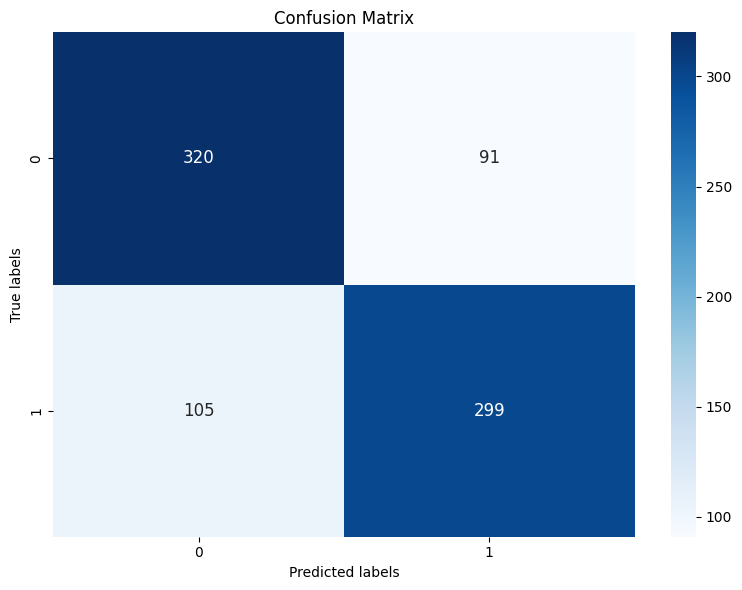

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       411
           1       0.77      0.74      0.75       404

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815



In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

plt.gca().set_ylim(len(np.unique(y_test)), 0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

### Test another Model

In [ ]:
import tensorflow as tf
from sklearn.model_selection import ParameterGrid

param_grid = {
    'units': [2, 3, 4, 5, 6, 7, 8],
    'activation': ['relu', 'tanh', 'sigmoid']
}

best_accuracy = 0
best_model = None

param_combinations = list(ParameterGrid(param_grid))

for params in param_combinations:
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=params['units'], activation=params['activation']))
    ann.add(tf.keras.layers.Dense(units=params['units'], activation=params['activation']))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    ann.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)

    _, accuracy = ann.evaluate(X_test, y_test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = ann
        best_params = params

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_params)


26/26 [==============================] - 0s 2ms/step - loss: 0.5254 - accuracy: 0.7227
Best Accuracy: 0.7865030765533447
Best Parameters: {'activation': 'relu', 'units': 6}


## PyCaret


In [ ]:
!pip install scipy==<desired_version>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install scipy==<desired_version>'


In [ ]:
!pip install --upgrade pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 101.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 91.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.8 MB/s

In [ ]:
!pip install --upgrade scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.2.0 requires scipy~=1.10.1, but you have scipy 1.12.0 which is incompatible.


In [ ]:
from pycaret.classification import *

<div align='left'><font size="5" color="#FF0000">Setup the model</font></div>
<hr>

In [ ]:
df_train = pd.DataFrame(X_train , y_train)

In [ ]:
classification_setup = setup(data = df_train, target = y_train , remove_outliers=True, normalize=True, normalize_method='robust', index=False)

,Description,Value
0,Session id,3690
1,Target,target
2,Target type,Binary
3,Original data shape,"(5310565, 13)"
4,Transformed data shape,"(5125586, 13)"
5,Transformed train set shape,"(3532416, 13)"
6,Transformed test set shape,"(1593170, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


<div align='left'><font size="5" color="#FF0000">Compare Model</font></div>
<hr>

In [ ]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:36:51
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7035,0.7679,0.6706,0.7198,0.6943,0.4071,0.4081,169.9560


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8771,0.8667,0.5105,0.8202,0.6293,0.5604,0.5831
1,0.8671,0.8720,0.4825,0.7841,0.5974,0.5232,0.5453
2,0.8471,0.8267,0.3916,0.7368,0.5114,0.4307,0.4610
3,0.8714,0.8780,0.5035,0.7912,0.6154,0.5427,0.5627
4,0.8286,0.8258,0.4126,0.6211,0.4958,0.3975,0.4096
5,0.8771,0.8821,0.4895,0.8434,0.6195,0.5523,0.5814
6,0.8729,0.8752,0.4789,0.8193,0.6044,0.5348,0.5622
7,0.8571,0.8484,0.4225,0.7692,0.5455,0.4691,0.4988
8,0.8714,0.8791,0.5000,0.7889,0.6121,0.5396,0.5598


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

<div align='left'><font size="5" color="#FF0000">Ensembling</font></div>
<hr>

In [ ]:
lightgbm = create_model('lightgbm');
rf  = create_model('rf');

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8729,0.8601,0.5105,0.7935,0.6213,0.5492,0.5685
1,0.8600,0.8649,0.4825,0.7419,0.5847,0.5051,0.5220
2,0.8486,0.8060,0.4406,0.7079,0.5431,0.4582,0.4767
3,0.8686,0.8663,0.4825,0.7931,0.6000,0.5269,0.5502
4,0.8486,0.8327,0.4895,0.6796,0.5691,0.4802,0.4897
5,0.8771,0.8783,0.5035,0.8276,0.6261,0.5577,0.5824
6,0.8471,0.8646,0.4155,0.7108,0.5244,0.4407,0.4633
7,0.8471,0.8430,0.4507,0.6882,0.5447,0.4576,0.4724
8,0.8629,0.8726,0.5000,0.7396,0.5966,0.5177,0.5321


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8786,0.8603,0.5035,0.8372,0.6288,0.5615,0.5875
1,0.8629,0.8540,0.4615,0.7765,0.5789,0.5033,0.5276
2,0.8529,0.8145,0.4056,0.7632,0.5297,0.4520,0.4838
3,0.8586,0.8500,0.4406,0.7683,0.5600,0.4830,0.5096
4,0.8443,0.8141,0.4196,0.6977,0.5240,0.4377,0.4580
5,0.8629,0.8470,0.4336,0.8052,0.5636,0.4908,0.5240
6,0.8629,0.8539,0.4225,0.8108,0.5556,0.4838,0.5198
7,0.8429,0.8370,0.4296,0.6778,0.5259,0.4373,0.4536
8,0.8714,0.8746,0.4859,0.8023,0.6053,0.5339,0.5579


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
blend = blend_models(estimator_list=[lightgbm,rf,gbc])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8743,0.8695,0.4965,0.8161,0.6174,0.5475,0.5717
1,0.8643,0.8710,0.4685,0.7791,0.5852,0.5100,0.5335
2,0.8529,0.8252,0.4056,0.7632,0.5297,0.4520,0.4838
3,0.8629,0.8693,0.4615,0.7765,0.5789,0.5033,0.5276
4,0.8400,0.8293,0.4336,0.6667,0.5254,0.4344,0.4489
5,0.8757,0.8762,0.4825,0.8415,0.6133,0.5457,0.5757
6,0.8586,0.8706,0.4296,0.7722,0.5520,0.4760,0.5049
7,0.8529,0.8488,0.4437,0.7241,0.5502,0.4683,0.4884
8,0.8729,0.8810,0.5000,0.7978,0.6147,0.5433,0.5646


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

<div align='left'><font size="5" color="#FF0000">Model Evaluation</font></div>
<hr>

In [ ]:
!pip install -U yellowbrick scikit-learn

  Using cached scikit_learn-1.4.0-1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.2.0 requires scikit-learn<1.3.0,>=1.0, but you have scikit-learn 1.4.0 which is incompatible.
sktime 0.21.1 requires scikit-learn<1.4.0,>=0.24.0, but you have scikit-learn 1.4.0 which is incompatible.


In [ ]:
!pip install yellowbrick==1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.3/271.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 25.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 30.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: Could not build wheels for numpy, which is required to install pyproject.toml-based projects


In [ ]:
plot_model(estimator = gbc, plot = 'confusion_matrix')

AttributeError: module 'yellowbrick.utils' has no attribute 'types'

In [ ]:
pred = predict_model(blend, data =dataset)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9091,0.9559,0.6264,0.8961,0.7374,0.6845,0.7005


## Web Application